### We are using LSTM model to predict the movement of closing price. The similar approach can also be applied to other columns such as start price.
### Take AAL as an example. The model is trained based on the AAL data. We make a prediction about the future price with the data of past 90 days, since it is a time series problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stocks_in_recent_5_years.csv')
df.head()

,date,open,high,low,close,volume,adj_close,name
0,2017-05-30,48.580002,47.790001,48.320000,47.959999,5512900.0,46.548439,AAL
1,2017-05-31,48.480000,47.529999,48.200001,48.410000,4486100.0,46.985199,AAL
2,2017-06-01,49.360001,48.299999,48.500000,49.049999,4421400.0,47.606354,AAL
3,2017-06-02,50.470001,49.369999,49.560001,49.520000,7708600.0,48.062527,AAL
4,2017-06-05,49.950001,49.400002,49.529999,49.740002,5466700.0,48.276051,AAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622537 entries, 0 to 622536
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       622537 non-null  object 
 1   open       622537 non-null  float64
 2   high       622537 non-null  float64
 3   low        622537 non-null  float64
 4   close      622537 non-null  float64
 5   volume     622537 non-null  float64
 6   adj_close  622537 non-null  float64
 7   name       622537 non-null  object 
dtypes: float64(6), object(2)
memory usage: 38.0+ MB


In [4]:
companies = df.name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG',
       'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALLE', 'ALL', 'AMAT',
       'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS',
       'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO',
       'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'A', 'BAC',
       'BAX', 'BA', 'BBWI', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BKNG',
       'BKR', 'BK', 'BLK', 'BLL', 'BMY', 'BRO', 'BR', 'BSX', 'BWA', 'BXP',
       'CAG', 'CAH', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CB', 'CCI', 'CCL',
       'CDAY', 'CDNS', 'CDW', 'CERN', 'CE', 'CFG', 'CF', 'CHD', 'CHRW',
       'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME', 'CMG',
       'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB',
       'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA',
       'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'C', 'DAL'

In [5]:
# Create a new dataframe with AAL parameters
stock = df.loc[df['name']=='AAL']
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1260 non-null   object 
 1   open       1260 non-null   float64
 2   high       1260 non-null   float64
 3   low        1260 non-null   float64
 4   close      1260 non-null   float64
 5   volume     1260 non-null   float64
 6   adj_close  1260 non-null   float64
 7   name       1260 non-null   object 
dtypes: float64(6), object(2)
memory usage: 88.6+ KB


In [6]:
stock.head()

,date,open,high,low,close,volume,adj_close,name
0,2017-05-30,48.580002,47.790001,48.320000,47.959999,5512900.0,46.548439,AAL
1,2017-05-31,48.480000,47.529999,48.200001,48.410000,4486100.0,46.985199,AAL
2,2017-06-01,49.360001,48.299999,48.500000,49.049999,4421400.0,47.606354,AAL
3,2017-06-02,50.470001,49.369999,49.560001,49.520000,7708600.0,48.062527,AAL
4,2017-06-05,49.950001,49.400002,49.529999,49.740002,5466700.0,48.276051,AAL


In [7]:
# A closing prices array
training_set = stock.iloc[:, 4:5].values

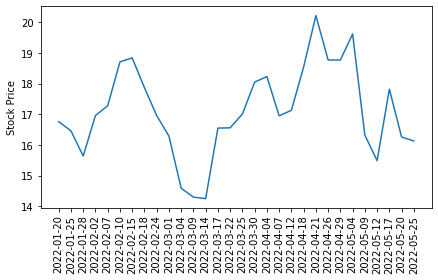

In [8]:
# Show 90 days training data
training_set_y = stock['close'][-90:][::3].tolist()
training_set_x = stock['date'][-90:][::3].tolist()
plt.plot(training_set_x, training_set_y)
plt.tick_params(axis='x', labelsize=10, rotation=90)
plt.tight_layout()
plt.ylabel('Stock Price')
plt.xlabel(None)
plt.show()

In [9]:
# normalizing the values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set.shape

(1260, 1)

### Create x_train and y_train.
* x_train: values of closing prices of past 365 days
* y_train: values of closing prices of the present day

In [10]:
x_train = []
y_train = []
timestamp = 90
length = len(training_set)
for i in range(timestamp, length):
    x_train.append(scaled_training_set[i-timestamp:i, 0])
    y_train.append(scaled_training_set[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [11]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.78737605 0.79647985 0.80942744 0.81893586 0.82338662 0.82338662
 0.8460449  0.85757636 0.83410883 0.81812661 0.81751972 0.81630585
 0.8106413  0.80416751 0.82176813 0.78879219 0.79688447 0.80780903
 0.80093061 0.80396516 0.79830061 0.81347358 0.82095889 0.83512035
 0.83653648 0.85413711 0.87011932 0.88994533 0.88246002 0.86121788
 0.90552292 0.90572527 0.91401983 0.90693906 0.89237306 0.8814485
 0.87598622 0.86728705 0.85454173 0.84098725 0.84907945 0.82864655
 0.83855959 0.837548   0.85009104 0.83775035 0.83977338 0.84483104
 0.84038035 0.82864655 0.8165082  0.79931212 0.79526598 0.80457213
 0.79870523 0.79647985 0.74833093 0.73862024 0.74185714 0.73578796
 0.70665588 0.68541366 0.73255106 0.72648189 0.71859196 0.71373657
 0.72223348 0.73376493 0.70564429 0.7135343  0.70402588 0.6991705
 0.74489176 0.75359094 0.76795466 0.75156783 0.74772404 0.73376493
 0.71495044 0.73599023 0.75359094 0.76916853 0.78211612 0.77968847
 0.76492004 0.77786771 0.77786771 0.78272301 0.83896414 0.843414

In [12]:
x_train.shape

(1170, 90)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1170, 90, 1)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

2022-05-29 08:25:14.913155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.fit(x_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
37/37 [==============================] - 13s 190ms/step - loss: 0.0273
Epoch 2/30
37/37 [==============================] - 7s 177ms/step - loss: 0.0051
Epoch 3/30
37/37 [==============================] - 7s 177ms/step - loss: 0.0046
Epoch 4/30
37/37 [==============================] - 7s 187ms/step - loss: 0.0046
Epoch 5/30
37/37 [==============================] - 7s 183ms/step - loss: 0.0048
Epoch 6/30
37/37 [==============================] - 7s 185ms/step - loss: 0.0036
Epoch 7/30
37/37 [==============================] - 7s 186ms/step - loss: 0.0035
Epoch 8/30
37/37 [==============================] - 7s 189ms/step - loss: 0.0032
Epoch 9/30
37/37 [==============================] - 7s 189ms/step - loss: 0.0031
Epoch 10/30
37/37 [==============================] - 7s 198ms/step - loss: 0.0038
Epoch 11/30
37/37 [==============================] - 7s 195ms/step - loss: 0.0029
Epoch 12/30
37/37 [==============================] - 7s 186ms/step - loss: 0.0027
Epoch 13/30
37/37 [=====

### Testing the performance of our model by plotting the predicted stock prices

In [16]:
testing_data = df.loc[df['name'] == 'DIS']
testing_data = testing_data.loc[:, testing_data.columns == 'close']

### Keep the previous 90 days to predict the present day value.

In [17]:
y_test = testing_data.iloc[timestamp:, 0:].values

In [18]:
closing_price = testing_data.iloc[:, 0:].values
scaled_closing_price = scaler.transform(closing_price)

In [19]:
# Get x_test
x_test = []  

for i in range(timestamp, len(testing_data)):
    x_test.append(scaled_closing_price[i-timestamp:i, 0])
    
x_test = np.array(x_test)
x_test.shape

(1170, 90)

In [20]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1170, 90, 1)

In [21]:
# Predict the stock prices
y_predict = model.predict(x_test)
predicted_price = scaler.inverse_transform(y_predict)

37/37 [==============================] - 4s 56ms/step


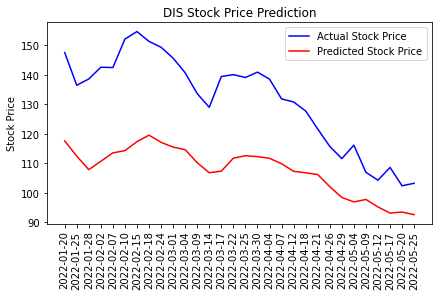

In [22]:
# Show the result (90 days)
y_test_damo = y_test[-90:][::3].tolist()
x_test_demo = stock['date'][-90:][::3].tolist()
predicted_price_demo = predicted_price[-90:][::3].tolist()
plt.plot(x_test_demo, y_test_damo, color = 'blue', label = 'Actual Stock Price')
plt.plot(x_test_demo, predicted_price_demo, color = 'red', label = 'Predicted Stock Price')
plt.tick_params(axis='x', labelsize=10, rotation=90)
plt.tight_layout()
plt.title('DIS Stock Price Prediction')
plt.ylabel('Stock Price')
plt.xlabel(None)
plt.legend()
plt.show()

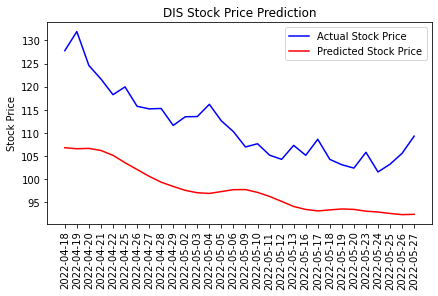

In [23]:
# Show the result (the most recent month)
y_test_damo = y_test[-30:].tolist()
x_test_demo = stock['date'][-30:].tolist()
predicted_price_demo = predicted_price[-30:].tolist()
plt.plot(x_test_demo, y_test_damo, color = 'blue', label = 'Actual Stock Price')
plt.plot(x_test_demo, predicted_price_demo, color = 'red', label = 'Predicted Stock Price')
plt.tick_params(axis='x', labelsize=10, rotation=90)
plt.tight_layout()
plt.title('DIS Stock Price Prediction')
plt.ylabel('Stock Price')
plt.xlabel(None)
plt.legend()
plt.show()

In [24]:
# Save the model
model.save('StockPredictionModel.h5')